# Machine Learning Nanodegree - Capstone Project

### Data Exploration and Preparation

#### Kenneth Gjaeringen
#### 5th December 2017

### Load Libraries

In [1]:
# Import libraries necessary for this project
import brewery
import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import US_States as us
from IPython.display import display # Allows the use of display() for DataFrames
from collections import defaultdict, Counter

%matplotlib inline


In [2]:
# Ensure correct data folder is linked before the data file is uploaded.
os.chdir('/Users/kgjaeringen/Documents/Machine Learning/Udacity/01 Course Code/02 Projects/07 Capstone/03 Data')

# Load data
data = pd.read_csv("loan.csv", header=0)

print("Original data shape: ", data.shape)
data.dtypes

/Users/kgjaeringen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


('Original data shape: ', (887379, 74))


id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [3]:

# Remove fields not required for this analysis
subset_1 = data.drop(["inq_last_12m",
                      "total_cu_tl",
                      "url", "desc",
                      #"zip_code",
                      "inq_last_6mths",
                      "mths_since_last_delinq",
                      "mths_since_last_record",
                      "total_pymnt",
                      "total_pymnt_inv",
                      "total_rec_prncp",
                      "total_rec_int",
                      "total_rec_late_fee",
                      "recoveries", 
                      "collection_recovery_fee",
                      "last_pymnt_d",
                      "next_pymnt_d",
                      "last_credit_pull_d",
                      "collections_12_mths_ex_med",
                      "mths_since_last_major_derog",
                      "last_pymnt_amnt",
                      "tot_cur_bal",
                      "mths_since_rcnt_il",
                      "total_bal_il",
                      "delinq_2yrs",
                      "out_prncp",
                      "out_prncp_inv",
                      "pymnt_plan",
                      "revol_bal",
                      "revol_util",
                      "total_acc",
                      "open_acc_6m",
                      "open_il_6m",
                      "open_il_12m",
                      "open_il_24m",
                      "mths_since_rcnt_il",
                      "total_bal_il",
                      "il_util",
                      "open_rv_12m",
                      "open_rv_24m",
                      "max_bal_bc",
                      "all_util",
                      "total_rev_hi_lim",
                      "inq_fi",
                      "total_cu_tl",
                      "tot_coll_amt",
                      "title",
                      "acc_now_delinq",
                      "emp_title",
                      "zip_code",
                      "annual_inc_joint", #too many blanks
                      "dti_joint", #too many blanks
                     "policy_code"], axis=1)

print("Revised data shape: ", subset_1.shape)

filename = 'amended_data.csv'

subset_1.to_csv(filename, index=False, encoding='utf-8')

URL = "amended_data.csv"

# Use brewery library to extract key features from amended dataset file.
b = brewery.create_builder()
b.csv_source(URL)
b.audit(distinct_threshold=None)
b.pretty_printer()

print "Dataset features:"
b.stream.run()



('Revised data shape: ', (887379, 25))
Dataset features:
+-------------------------+------------+----------+-----------------+------------------+--------------+
|field_name               |record_count|null_count|null_record_ratio|empty_string_count|distinct_count|
+-------------------------+------------+----------+-----------------+------------------+--------------+
|id                       |      887379|         0|              0.0|                 0|        887379|
|member_id                |      887379|         0|              0.0|                 0|        887379|
|loan_amnt                |      887379|         0|              0.0|                 0|          1372|
|funded_amnt              |      887379|         0|              0.0|                 0|          1372|
|funded_amnt_inv          |      887379|         0|              0.0|                 0|          9856|
|term                     |      887379|         0|              0.0|                 0|             2|
|int_ra

#### Extract Distinct Values For the Various Category Fields

In [4]:
# Distinct categories from fields containing categories
print("Term: ", subset_1.term.unique())
print("Grade: ", subset_1.grade.unique())
print("Sub-Grade: ", subset_1.sub_grade.unique())
print("Employment Length: ", subset_1.emp_length.unique())
print("Home Ownership: ", subset_1.home_ownership.unique())
print("Verification Status: ", subset_1.verification_status.unique())
print("Loan Status: ", subset_1.loan_status.unique())
print("Loan Purpose: ", subset_1.purpose.unique())
print("Initial Listing Status of the Loan: ", subset_1.initial_list_status.unique())
print("Application Type: ", subset_1.application_type.unique())
print("Verification Status Joint: ", subset_1.verification_status_joint.unique())
print("Loan Completion Months: ", subset_1.issue_d.unique())
print("States: ", subset_1.addr_state.unique())

('Term: ', array([' 36 months', ' 60 months'], dtype=object))
('Grade: ', array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object))
('Sub-Grade: ', array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object))
('Employment Length: ', array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object))
('Home Ownership: ', array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object))
('Verification Status: ', array(['Verified', 'Source Verified', 'Not Verified'], dtype=object))
('Loan Status: ', array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not 

#### Data Transformation

Normalisation and discretise data fields.

In [5]:
def MainGrade(x):
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3
    elif x == 'D':
        return 4
    elif x == 'E':
        return 5
    elif x == 'F':
        return 6
    elif x == 'G':
        return 7
    else:
        return 0
    
def SubGrade(x):
    lista = MainGrade(x[0]) 
    listb = x[-1]
    return int(str(lista) + str(listb))

def Ownership(x):
    if x in ('OTHER','NONE','ANY'):
        return 1
    else:
        return 0
    
def LoanStatus(x):
    if x in ('Default','Charged Off','Does not meet the credit policy. Status:Charged Off'):
        return 1
    else:
        return 0
    
def InitListingStatus(x):
    if x in ('f'):
        return 1
    elif x in ('w'):
        return 2
    else:
        return 0
    
def DateConv(x):
    conversion = datetime.strptime(x, '%b-%Y')  #'%b-%Y'
    year_conv = conversion.year
    mth_conv = conversion.month
    int_conv = 100*year_conv + mth_conv
    #source: https://stackoverflow.com/questions/28154066/how-to-convert-datetime-to-integer-in-python
    return year_conv #int_conv

subset_1['Term_36M'] = np.where(subset_1.term == ' 36 months', 1, 0)
subset_1['Term_60M'] = np.where(subset_1.term == ' 60 months', 1, 0)

subset_1['MainGrade'] = subset_1.grade.apply(MainGrade)
subset_1['SubGrade'] = subset_1.sub_grade.apply(SubGrade)

subset_1['Emp_Lenght_10_Plus'] = np.where(subset_1.emp_length == '10+ years',1,0)
subset_1['Emp_Lenght_9_Yrs'] = np.where(subset_1.emp_length == '9 years',1,0)
subset_1['Emp_Lenght_8_Yrs'] = np.where(subset_1.emp_length == '8 years',1,0)
subset_1['Emp_Lenght_7_Yrs'] = np.where(subset_1.emp_length == '7 years',1,0)
subset_1['Emp_Lenght_6_Yrs'] = np.where(subset_1.emp_length == '6 years',1,0)
subset_1['Emp_Lenght_5_Yrs'] = np.where(subset_1.emp_length == '5 years',1,0)
subset_1['Emp_Lenght_4_Yrs'] = np.where(subset_1.emp_length == '4 years',1,0)
subset_1['Emp_Lenght_3_Yrs'] = np.where(subset_1.emp_length == '3 years',1,0)
subset_1['Emp_Lenght_2_Yrs'] = np.where(subset_1.emp_length == '2 years',1,0)
subset_1['Emp_Lenght_1_Yrs'] = np.where(subset_1.emp_length == '1 year',1,0)
subset_1['Emp_Lenght_1_Yrs_Less'] = np.where(subset_1.emp_length == '< 1 year',1,0)
subset_1['Emp_Lenght_NA'] = np.where(subset_1.emp_length == 'n/a',1,0)

subset_1['Home_Owner_Rent'] = np.where(subset_1.home_ownership == 'RENT',1,0)
subset_1['Home_Owner_Own'] = np.where(subset_1.home_ownership == 'OWN',1,0)
subset_1['Home_Owner_Mortgage'] = np.where(subset_1.home_ownership == 'MORTGAGE',1,0)
subset_1['Home_Owner_Other'] = subset_1.home_ownership.apply(Ownership)

subset_1['Verification_Verified'] = np.where((subset_1.verification_status == 'Verified') 
                                             | (subset_1.verification_status == 'Source Verified'),1,0)
subset_1['Verification_Not_Verified'] = np.where(subset_1.verification_status == 'Not Verified',1,0)
                  
subset_1['Appl_Type_Ind'] = np.where(subset_1.application_type == 'INDIVIDUAL', 1, 0)
subset_1['Appl_Type_Joint'] = np.where(subset_1.application_type == 'JOINT', 1, 0)

subset_1['Verification_Joint_Verified'] = np.where((subset_1.verification_status_joint == 'Verified') 
                                             | (subset_1.verification_status_joint == 'Source Verified'),1,0)
subset_1['Verification_Joint_Not_Verified'] = np.where((subset_1.verification_status_joint == 'Verified') 
                                             | (subset_1.verification_status_joint == 'Source Verified'),0,1)

subset_1['Loan_Purpose_CC'] = np.where(subset_1.purpose == 'credit_card',1,0)
subset_1['Loan_Purpose_Car'] = np.where(subset_1.purpose == 'car',1,0)
subset_1['Loan_Purpose_SB'] = np.where(subset_1.purpose == 'small_business',1,0)
subset_1['Loan_Purpose_Other'] = np.where(subset_1.purpose == 'other',1,0)
subset_1['Loan_Purpose_Wedding'] = np.where(subset_1.purpose == 'wedding',1,0)
subset_1['Loan_Purpose_DC'] = np.where(subset_1.purpose == 'debt_consolidation',1,0)
subset_1['Loan_Purpose_HImp'] = np.where(subset_1.purpose == 'home_improvement',1,0)
subset_1['Loan_Purpose_MPurch'] = np.where(subset_1.purpose == 'major_purchase',1,0)
subset_1['Loan_Purpose_Medical'] = np.where(subset_1.purpose == 'medical',1,0)
subset_1['Loan_Purpose_Moving'] = np.where(subset_1.purpose == 'moving',1,0)
subset_1['Loan_Purpose_Vacation'] = np.where(subset_1.purpose == 'vacation',1,0)
subset_1['Loan_Purpose_House'] = np.where(subset_1.purpose == 'house',1,0)
subset_1['Loan_Purpose_RenewEnergy'] = np.where(subset_1.purpose == 'renewable_energy',1,0)
subset_1['Loan_Purpose_Education'] = np.where(subset_1.purpose == 'educational',1,0)

subset_1['Completion_Date'] = subset_1.issue_d.apply(DateConv)

subset_1['Earliest_Cr_Line_nan'] = subset_1.earliest_cr_line.replace(np.nan, 'Aug-2001')  #'Aug-2001'
subset_1['Earliest_Cr_Line'] = subset_1.Earliest_Cr_Line_nan.apply(DateConv)
subset_1['US_States'] = subset_1.addr_state.apply(us.US_States_Lookup)

subset_1['Initial_Listing_Status'] = subset_1.initial_list_status.apply(InitListingStatus)

subset_1['Loan_Status'] = subset_1.loan_status.apply(LoanStatus)

print('Complete!')


Complete!


#### Remove Fields Not Required and Extract Summary Features

In [6]:
print("Subset_1 data shape: ", subset_1.shape)

# Remove fields not required for this analysis
subset_2 = subset_1.drop(["term",
                      "grade",
                      "sub_grade", 
                    "emp_length",
                    "home_ownership",
                    "verification_status",
                    "application_type",
                    "verification_status_joint",
                    "purpose",
                    "issue_d",
                    "earliest_cr_line",
                    "Earliest_Cr_Line_nan",
                    "initial_list_status",
                    "addr_state",
                          "id", #not deemed essential
                          "member_id", #not deemed essential
                     "loan_status"], axis=1)

print("Revised data shape: ", subset_2.shape)

filename = 'main_analysis_data.csv'

subset_2.to_csv(filename, index=False, encoding='utf-8')

URL = "main_analysis_data.csv"

# Use brewery library to extract key features from amended dataset file.
b = brewery.create_builder()
b.csv_source(URL)
b.audit(distinct_threshold=None)
b.pretty_printer()

print("Dataset features:")
b.stream.run()

print("Subset_2 data shape: ", subset_2.shape)

del subset_1

('Subset_1 data shape: ', (887379, 71))
('Revised data shape: ', (887379, 54))
Dataset features:
+-------------------------------+------------+----------+-----------------+------------------+--------------+
|field_name                     |record_count|null_count|null_record_ratio|empty_string_count|distinct_count|
+-------------------------------+------------+----------+-----------------+------------------+--------------+
|loan_amnt                      |      887379|         0|              0.0|                 0|          1372|
|funded_amnt                    |      887379|         0|              0.0|                 0|          1372|
|funded_amnt_inv                |      887379|         0|              0.0|                 0|          9856|
|int_rate                       |      887379|         0|              0.0|                 0|           542|
|installment                    |      887379|         0|              0.0|                 0|         68711|
|annual_inc            

In [7]:
# Display a description of the dataset
display(subset_2.describe())

#As there aren't many rows with blank values therefore these rows will be dropped
subset_3 = subset_2.dropna()

display(subset_3.describe())

filename = 'main_analysis_data_2.csv'

subset_3.to_csv(filename, index=False, encoding='utf-8')

URL = "main_analysis_data_2.csv"

# Use brewery library to extract key features from amended dataset file.
b = brewery.create_builder()
b.csv_source(URL)
b.audit(distinct_threshold=None)
b.pretty_printer()

print("Dataset features:")
b.stream.run()

print("Subset_3 data shape: ", subset_3.shape)

del subset_2


/Users/kgjaeringen/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,Term_36M,...,Loan_Purpose_Moving,Loan_Purpose_Vacation,Loan_Purpose_House,Loan_Purpose_RenewEnergy,Loan_Purpose_Education,Completion_Date,Earliest_Cr_Line,US_States,Initial_Listing_Status,Loan_Status
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887379.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,11.548469,0.195307,0.699955,...,0.006101,0.005337,0.004177,0.000648,0.000477,2014.021761,1997.700289,26.946450,1.485171,0.053222
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,5.317313,0.582091,0.458278,...,0.077871,0.072860,0.064498,0.025447,0.021828,1.261741,7.434035,16.814338,0.499780,0.224476
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1944.000000,1.000000,1.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,NaN,11.910000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1994.000000,11.000000,1.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,NaN,17.650000,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1999.000000,26.000000,1.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,NaN,23.950000,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2003.000000,41.000000,2.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,90.000000,86.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,2012.000000,57.000000,2.000000,1.000000


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,Term_36M,...,Loan_Purpose_Moving,Loan_Purpose_Vacation,Loan_Purpose_House,Loan_Purpose_RenewEnergy,Loan_Purpose_Education,Completion_Date,Earliest_Cr_Line,US_States,Initial_Listing_Status,Loan_Status
count,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,8.873500e+05,887350.000000,887350.000000,887350.000000,887350.000000,...,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000,887350.000000
mean,14755.619260,14742.234237,14702.917498,13.246866,436.727404,7.502770e+04,18.157379,11.548469,0.195307,0.699945,...,0.006101,0.005337,0.004178,0.000648,0.000477,2014.021990,1997.700181,26.946441,1.485187,0.053220
std,8435.354701,8429.794626,8441.868754,4.381873,244.183611,6.469830e+04,17.190784,5.317313,0.582091,0.458282,...,0.077872,0.072861,0.064499,0.025448,0.021828,1.261123,7.434133,16.814457,0.499781,0.224473
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1944.000000,1.000000,1.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.730000,4.500000e+04,11.910000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1994.000000,11.000000,1.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.660000,11.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1999.000000,26.000000,1.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,14.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2003.000000,41.000000,2.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,90.000000,86.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,2012.000000,57.000000,2.000000,1.000000


Dataset features:
+-------------------------------+------------+----------+-----------------+------------------+--------------+
|field_name                     |record_count|null_count|null_record_ratio|empty_string_count|distinct_count|
+-------------------------------+------------+----------+-----------------+------------------+--------------+
|loan_amnt                      |      887350|         0|              0.0|                 0|          1372|
|funded_amnt                    |      887350|         0|              0.0|                 0|          1372|
|funded_amnt_inv                |      887350|         0|              0.0|                 0|          9856|
|int_rate                       |      887350|         0|              0.0|                 0|           542|
|installment                    |      887350|         0|              0.0|                 0|         68704|
|annual_inc                     |      887350|         0|              0.0|                 0|        

In [8]:
# Remove completion cohorts 2014 and 2015.

subset_4 = subset_3[subset_3.Completion_Date != 2015]
subset_4 = subset_4[subset_4.Completion_Date != 2014]

display(subset_4.describe())

filename = 'main_analysis_data_3.csv'

subset_4.to_csv(filename, index=False, encoding='utf-8')

URL = "main_analysis_data_3.csv"

# Use brewery library to extract key features from amended dataset file.
b = brewery.create_builder()
b.csv_source(URL)
b.audit(distinct_threshold=None)
b.pretty_printer()

print("Dataset features:")
b.stream.run()

print("Subset_4 data shape: ", subset_4.shape)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,Term_36M,...,Loan_Purpose_Moving,Loan_Purpose_Vacation,Loan_Purpose_House,Loan_Purpose_RenewEnergy,Loan_Purpose_Education,Completion_Date,Earliest_Cr_Line,US_States,Initial_Listing_Status,Loan_Status
count,230628.000000,230628.000000,230628.000000,230628.000000,230628.000000,2.306280e+05,230628.000000,230628.000000,230628.000000,230628.000000,...,230628.000000,230628.000000,230628.000000,230628.000000,230628.000000,230628.000000,230628.000000,230628.000000,230628.000000,230628.000000
mean,13753.700331,13702.200947,13567.047223,13.889045,421.453605,7.166649e+04,16.380104,10.695605,0.097326,0.760337,...,0.007224,0.005676,0.006586,0.000989,0.001830,2012.258750,1997.105338,26.448554,1.172603,0.127786
std,8089.293050,8060.441167,8101.087105,4.389254,241.404372,5.431211e+04,7.579755,4.632152,0.382258,0.426879,...,0.084685,0.075124,0.080889,0.031427,0.042737,1.123964,6.997314,16.954467,0.377904,0.333852
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1946.000000,1.000000,1.000000,0.000000
25%,7500.000000,7500.000000,7300.000000,10.740000,244.970000,4.500000e+04,10.710000,7.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1994.000000,9.000000,1.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,13.670000,374.390000,6.100000e+04,16.130000,10.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1998.000000,25.000000,1.000000,0.000000
75%,19125.000000,19000.000000,18853.577874,16.780000,552.670000,8.550000e+04,21.810000,13.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,2002.000000,40.000000,1.000000,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,34.990000,62.000000,54.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,2010.000000,57.000000,2.000000,1.000000


Dataset features:
+-------------------------------+------------+----------+-----------------+------------------+--------------+
|field_name                     |record_count|null_count|null_record_ratio|empty_string_count|distinct_count|
+-------------------------------+------------+----------+-----------------+------------------+--------------+
|loan_amnt                      |      230628|         0|              0.0|                 0|          1278|
|funded_amnt                    |      230628|         0|              0.0|                 0|          1285|
|funded_amnt_inv                |      230628|         0|              0.0|                 0|          9829|
|int_rate                       |      230628|         0|              0.0|                 0|           477|
|installment                    |      230628|         0|              0.0|                 0|         39211|
|annual_inc                     |      230628|         0|              0.0|                 0|        

#### Data Visualisaion

Explore adjusted dataset features before machine learning code is applied.

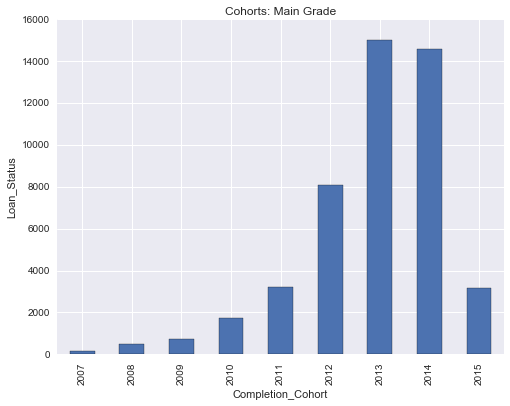

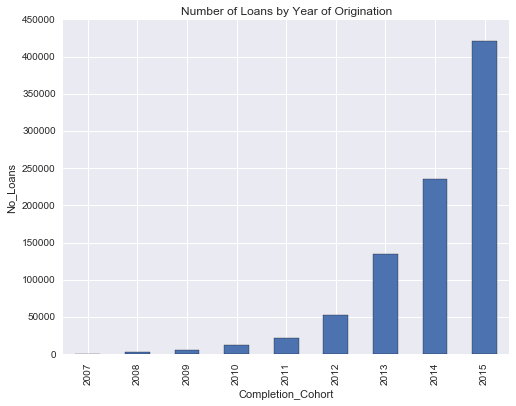

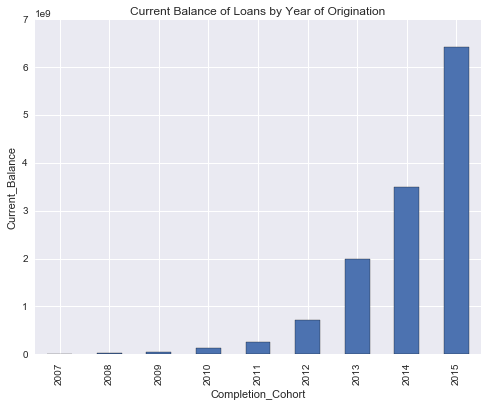

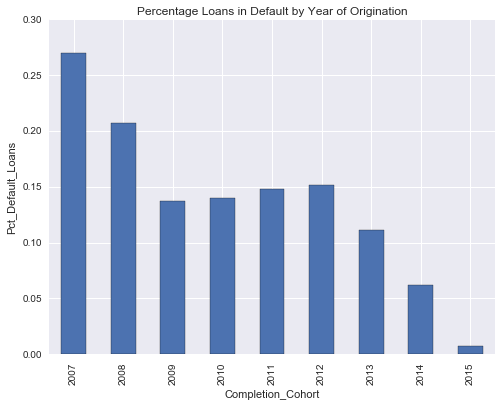

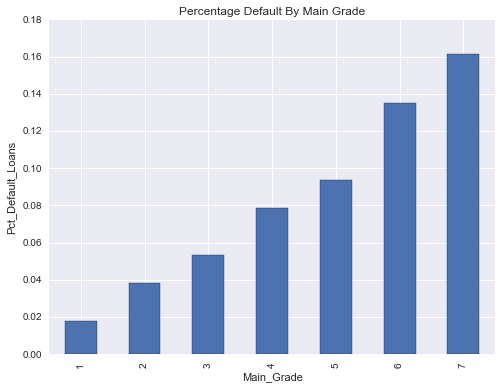

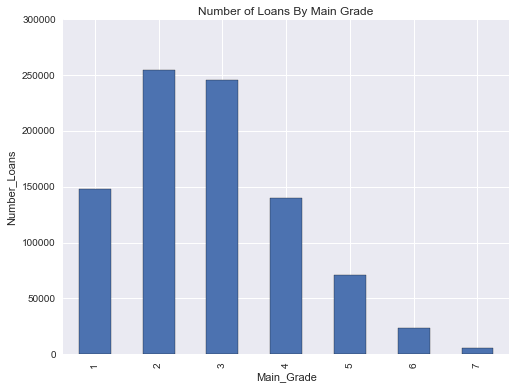

In [9]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8, 6)

#Dataset Visualisation

var = subset_3.groupby(subset_3.Completion_Date).Loan_Status.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.title('Cohorts: Main Grade')
ax1.set_ylabel('Loan_Status')
var.plot(kind='bar')
plt.xlabel('Completion_Cohort')
plt.show()

var2 = subset_3.groupby(subset_3.Completion_Date).Loan_Status.count()
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.set_ylabel('No_Loans')
var2.plot(kind='bar')
plt.xlabel('Completion_Cohort')
plt.title('Number of Loans by Year of Origination')
plt.show()

var2 = subset_3.groupby(subset_3.Completion_Date).loan_amnt.sum()
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.set_ylabel('Current_Balance')
var2.plot(kind='bar')
plt.xlabel('Completion_Cohort')
plt.title('Current Balance of Loans by Year of Origination')
plt.show()

var1 = subset_3.groupby(subset_3.Completion_Date).Loan_Status.count()
var2 = subset_3.groupby(subset_3.Completion_Date).Loan_Status.sum()
var3 = var2 / var1
fig = plt.figure()
ax3 = fig.add_subplot(1,1,1)
ax3.set_ylabel('Pct_Default_Loans')
var3.plot(kind='bar')
plt.xlabel('Completion_Cohort')
plt.title('Percentage Loans in Default by Year of Origination')
plt.show()


var1 = subset_3.groupby(subset_3.MainGrade).Loan_Status.count()
var2 = subset_3.groupby(subset_3.MainGrade).Loan_Status.sum()
var4 = var2 / var1
fig = plt.figure()
ax4 = fig.add_subplot(1,1,1)
ax4.set_ylabel('Pct_Default_Loans')
var4.plot(kind='bar')
plt.xlabel('Main_Grade')
plt.title('Percentage Default By Main Grade')
plt.show()

var1 = subset_3.groupby(subset_3.MainGrade).Loan_Status.count()
var2 = var1.sum()
var4 = var1
fig = plt.figure()
ax4 = fig.add_subplot(1,1,1)
ax4.set_ylabel('Number_Loans')
var4.plot(kind='bar')
plt.xlabel('Main_Grade')
plt.title('Number of Loans By Main Grade')
plt.show()

Completion_Date      2007      2008      2009      2010      2011      2012  \
MainGrade                                                                     
1                0.044776  0.059748  0.067332  0.047350  0.064651  0.071461   
2                0.170455  0.173401  0.121799  0.116626  0.118355  0.125520   
3                0.251852  0.210345  0.152819  0.153170  0.178590  0.174737   
4                0.306122  0.264916  0.179927  0.207958  0.222103  0.218217   
5                0.313131  0.263158  0.217532  0.248441  0.259344  0.269702   
6                0.480769  0.342342  0.266667  0.311897  0.307479  0.289734   
7                0.485714  0.325581  0.327273  0.330827  0.325123  0.371648   

Completion_Date      2013      2014      2015  
MainGrade                                      
1                0.033607  0.016118  0.001459  
2                0.075559  0.036070  0.003495  
3                0.121560  0.062120  0.006826  
4                0.166602  0.089135  0.013375  


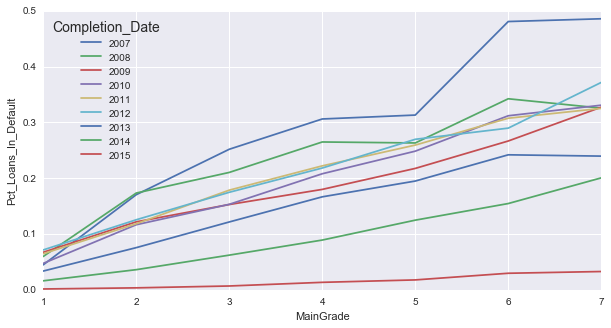

In [10]:
#Visualise completion cohorts vs MainGrade and Loan Status
x =  subset_3.groupby(['Completion_Date', 'MainGrade']).Completion_Date.count()
y =  subset_3.groupby(['Completion_Date', 'MainGrade']).Loan_Status.sum()
xy = y/x

MainData = xy.unstack(0).head(7)
print(xy.unstack(0).head(7))
MainData.plot(figsize=(10,5))

plt.ylabel('Pct_Loans_In_Default')
plt.show()

#Cohort analysis source: http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/


#### An Imbalanced Dataset

In [11]:
#source: https://github.com/silicon-valley-data-science/learning-from-imbalanced-classes/blob/master/ImbalancedClasses.ipynb


def class_info(classes):
    counts = Counter(classes)
    total = float(sum(counts.values())*1.0)
    for cls in counts.keys():
        print("%2s: % 7d  =  % 5.1f%%" % (cls, counts[cls], counts[cls]/total*100))
        #performance[cls] = counts[cls]/total*100
        
    #labelIDs = list(sorted(subset_3.Loan_Status.unique()))
    
print("Initial class percentages:")
class_info(subset_3.Loan_Status)

Initial class percentages:
 0:  840125  =   94.7%
 1:   47225  =    5.3%


In [12]:
def class_info(classes):
    counts = Counter(classes)
    total = float(sum(counts.values())*1.0)
    for cls in counts.keys():
        print("%2s: % 7d  =  % 5.1f%%" % (cls, counts[cls], counts[cls]/total*100))
        #performance[cls] = counts[cls]/total*100
        
    #labelIDs = list(sorted(subset_3.Loan_Status.unique()))
    
print("Initial class percentages:")
class_info(subset_4.Loan_Status)

Initial class percentages:
 0:  201157  =   87.2%
 1:   29471  =   12.8%


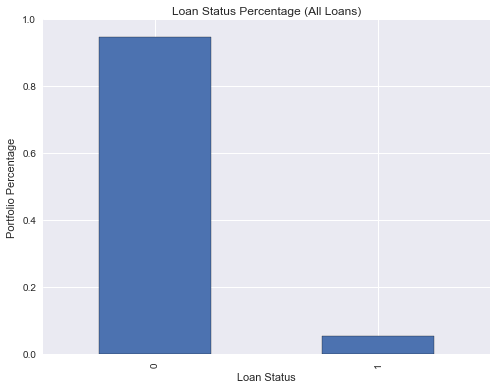

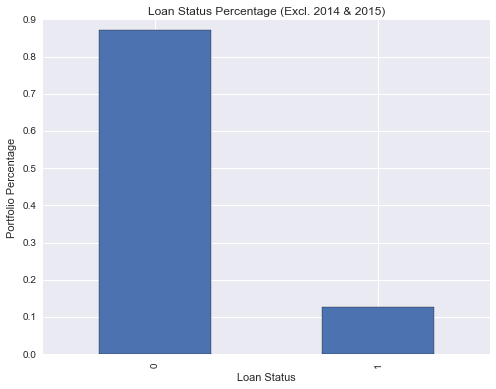

In [13]:
var = subset_3.groupby(subset_3.Loan_Status).Loan_Status.count()
var2 = var / var.sum()

fig = plt.figure()
ax5 = fig.add_subplot(1,1,1)
ax5.set_ylabel('Portfolio Percentage')
var2.plot(kind='bar')
plt.xlabel('Loan Status')
plt.title('Loan Status Percentage (All Loans)')
plt.show()

var = subset_4.groupby(subset_4.Loan_Status).Loan_Status.count()
var2 = var / var.sum()

fig = plt.figure()
ax5 = fig.add_subplot(1,1,1)
ax5.set_ylabel('Portfolio Percentage')
var2.plot(kind='bar')
plt.xlabel('Loan Status')
plt.title('Loan Status Percentage (Excl. 2014 & 2015)')
plt.show()